<a href="https://colab.research.google.com/github/yurahuna/graphillion_tutorial/blob/master/ja/06_graph_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GraphSet

This chapter introduces the main features of the `GraphSet` module, and almost all graph set processing using Graphillion can be performed using the `GraphSet` class.

Processing a graph set using GraphSet proceeds as follows.

1. Initialization (universe setting)
2. Create a graph set object
3. Manipulate and transform a graph set
4. Querying the graph set (optimization, counting, etc.)

Depending on the problem to be solved, steps 2-4 may be repeated to solve the problem. The following sections introduce the functions of `GraphSet` corresponding to each step. For more detailed explanations, please refer to the official documentation of `Graphillion` (https://github.com/takemaru/graphillion/wiki).

## Initialization process

Initialization is required to use Graphillion. Initialization can be performed by calling the `GraphSet.set_universe(universe)` method with the `universe` graph `univ` as an argument.

First, import the `GraphSet` class.

In [1]:
!pip install graphillion
!git clone https://github.com/nsnmsak/graphillion_tutorial
!cp graphillion_tutorial/ja/tutorial_util.py .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for graphillion: filename=Graphillion-1.5-cp310-cp310-linux_x86_64.whl size=2384566 sha256=dc8118cca504b192170d3b6affabdd25fb3d245933d2f0a600c382ad137db474
  Stored in directory: /root/.cache/pip/wheels/41/52/0c/381fe526c67fcd6febe031338c1338628120ad9dab12b22c45
Successfully built graphillion
Cloning into 'graphillion_tutorial'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 294 (delta 3), reused 2 (delta 2), pack-reused 288
Receiving objects: 100% (294/294), 6.61 MiB | 17.22 MiB/s, done.
Resolving deltas: 100% (179/179), done.


In [2]:
from graphillion import GraphSet
from tutorial_util import draw_subgraph, draw_universe

Next, set the `universe` with `GraphSet.set_universe()`.

In [3]:
univ = [(1, 2), (2, 3), (1, 4), (2, 5), (3, 6), (4, 5), (5, 6)]
GraphSet.set_universe(univ)

Edges are represented as vertex pairs and `universe` is represented as a list of edges. Thus `universe` is represented as a list of vertex pairs. Here, the following graph is set as `universe`.

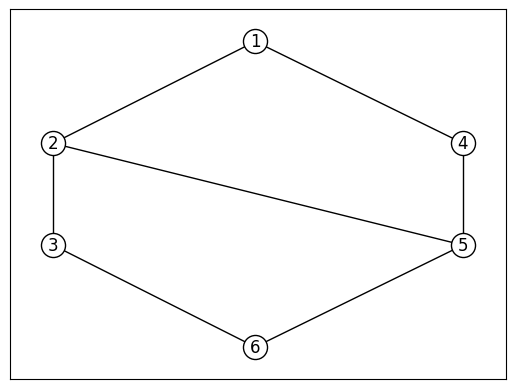

In [4]:
draw_universe()

## Creating a graph set

Next, construct a `GraphSet` object that represents the graph set needed to solve the problem. The graph set to be constructed depends on the purpose. For example, if you want to solve the shortest path problem or the longest path problem, you first construct a `GraphSet` object that represents the set of all paths, and then create the desired `GraphSet` by making minor adjustments to it.

### Creating a graph set with a constructor

The GraphSet module provides a variety of operations for manipulating graph sets. The most basic way to create a graph set is to explicitly specify a graph set.

In [5]:
graph1 = [(1, 4)]
graｐh2 = [(1, 2), (2, 3)]

gs = GraphSet([graph1, graph2])
gs

GraphSet([[(1, 4)], [(1, 2), (2, 3)]])

By passing a `list` of graphs (`tuple` of `tuples` representing edges) when initializing a `GraphSet` object, the corresponding `GraphSet` can be created.

An empty list `[]` can also be passed to the constructor as an argument to create an empty graph set.

In [6]:
gs = GraphSet([])
gs

GraphSet([])

Another initialization method is to specify a list of edges that the subgraph contains and a list of edges that it does not contain.

In [7]:
gs = GraphSet({'include': graph1, 'exclude': graph2})
gs

GraphSet([[(1, 4)], [(1, 4), (4, 5)], [(1, 4), (2, 5)], [(1, 4), (3, 6)], [( ...

The `gs` obtained in the example above represents a set of subgraphs that contain the edge `(1, 4)` but not `(1, 2)` or `(2, 3)`.

As a special case of this initialization method, an empty dictionary object `{}` can be passed as an argument to create a `GraphSet` object consisting of all subgraphs in the `universe`.

In [8]:
gs = GraphSet({})
gs

GraphSet([[], [(1, 4)], [(4, 5)], [(1, 2)], [(2, 5)], [(2, 3)], [(3, 6)], [( ...

If the number of edges is `n`, there are $2^n$ possible subgraphs. One may be concerned that such a large set of subgraphs may be too large to process, but with ZDD, the set of all possible subgraphs can be represented on the computer in a very small space.

### Construction Methods for Specific Graph Sets

In addition to the above constructors, Graphillion also provides specialized methods for specific graph sets, such as paths, trees, and connected components. To address these situations, Graphilion provides a variety of graph set-specific construction methods. Examples of such methods are listed below.

| Method | Description |
| :------------------------------------------- | :----------------------------------------------------------- |
| `GraphSet.paths(s, t)` | creates a set of paths from vertex `s` to `t`.                   |
| `GraphSet.connected_components(vertices)` | create a set of connected components such that all vertices in `vertices` are connected. |
| `GraphSet.cliques(k)` | create a set of cliques containing `k` vertices.                  | `GraphSet.cliques(k)
| `GraphSet.trees(root, is_spanning=False)` | create a set of trees that contain the root vertex `root`. If `is_spanning=True`, it creates a set of spanning trees. | `GraphSet.forests.
| `GraphSet.forests(roots, is_spanning=False)` | creates a set of forests (collections of trees) such that each vertex in `roots` is a root. If `is_spannnig=True`, it creates a set of spanning forests. | `GraphSet.cycles
| `GraphSet.cycles(is_hamilton=False)` | creates a set of cycles. If `is_hamilton=True`, it creates a set of Hamiltonian cycles. |

In addition to methods listed above, Graphillion provides specialized construction methods for specific graph sets. Please refer to the official Graphillion documentation for details.

Let's look at some examples.

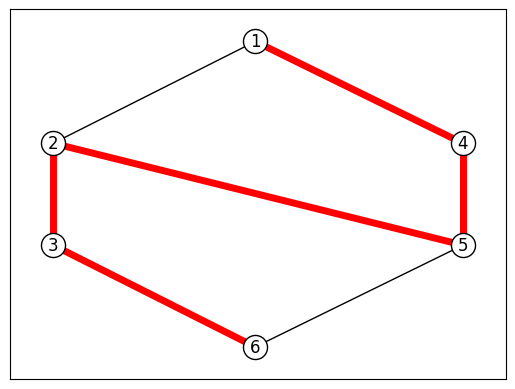

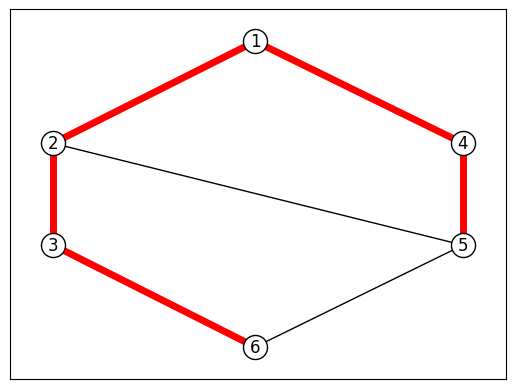

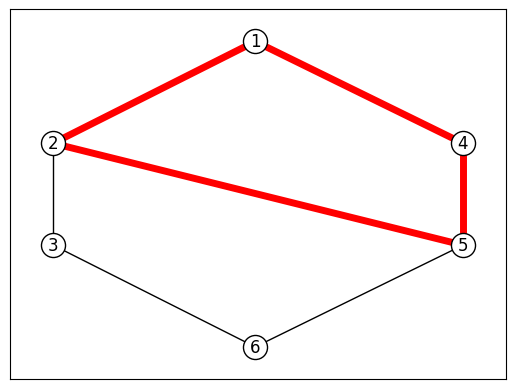

In [9]:
paths = GraphSet.paths(1, 6) # the set of paths from vertex 1 to vertex 6
draw_subgraph(subgraph=paths.choice())

trees = GraphSet.trees(1, is_spanning=True) # the set of spanning trees (trees containing all vertices) whose root is veretx 1
draw_subgraph(trees.choice())

cycles = GraphSet.cycles()
draw_subgraph(cycles.choice())

`gs.choice()` is a method for selecting a graph from the set of graphs represented by a `GraphSet` object.

These graph construction methods do more than provide a convenient interface to frequently used functions. They perform specialized algorithms to quickly construct a ZDD corresponding to a set of graphs. In the following, these `GraphSet` construction methods are referred to as **purpose-specific construction methods**.

Purpose-specific construction methods are much faster than ordinary ZDD construction methods. Therefore, when a `GraphSet` representing a certain graph set is needed, it is important to first consider whether a purpose-specific construction method can be used.

The time and space computational complexity of the purpose-specific construction method is approximately proportional to the number of vertices in the ZDD to be constructed. This fact is ideal in the sense that no extra computation is required to construct a ZDD. However, the size of the constructed ZDD will not be known until it is actually constructed. [Chapter 9](09_practical_guide.ipynb) provides guidelines for estimating the size of ZDDs constructed by the purpose-specific construction method.

## Graph set manipulation and transformation

Graphillion provides a rich set of functions for manipulating a `GraphSet` object to create another `GraphSet` object. Once the original graph set has been constructed using the graph set construction method, these graph set manipulation functions can be used to create the desired `GraphSet`. Some typical operations are introduced below.

### Binary operations on graph sets

First, here is an example of a method that performs a composite operation on two `GraphSet` objects `gs1` and `gs2` to create a new `GraphSet` object.

| Method | Description |
| :-------------------------------------------- |:------------------------------------------------------------ |
| `union(gs1.union(gs2)` | returns the set of graphs contained in either `gs1` or `gs2`.         |: | `gs1.intersection(gs1.intersection(gs2))
| `intersection(gs2)` | returns the set of graphs contained in both `gs1` and `gs2`.        | `gs1.difference(gs2)
| `difference(gs2)` | return the set of graphs that are contained in `gs1` but not in `gs2`. | `gs1.symmetric(gs2)
| `symmetric_difference(gs2)` | return the set of graphs that are contained in only one of `gs1` or `gs2`.   | `gs1.join(gs2)
| `join(gs2)` | returns the graph set that is the direct product of `gs1` and `gs2`. The direct product is the set defined as $\{a \cup b \mid a \in \mathtt{gs1}, b \in \mathtt{gs2} \}$. | `gs1.subgraph
| `subgraphs(gs2)` | returns the set of graphs in `gs1` that are subgraphs of one of the graphs in `gs2`. | `gs1.supergraph(gs2)` | `gs2.
| `supergraphs(gs2)` | return a graph set consisting of graphs in `gs1` that are subgraphs of one of the graphs in `gs2`. | returns a graph set consisting of graphs in `gs1` that contain any graph in `gs2` as a subgraph.

Here is an example of the operation.

In [10]:
graph1 = [(1, 4)]
graｐh2 = [(1, 2), (2, 3)]
gs1 = GraphSet([graph1])
gs2 = GraphSet([graph2])
gs1.union(gs2)

GraphSet([[(1, 4)], [(1, 2), (2, 3)]])

In [11]:
graph1 = [(1, 4)]
graｐh2 = [(1, 2), (2, 3)]
gs1 = GraphSet([graph1, graph2])
gs2 = GraphSet([graph2])
intersection_gs = gs1.intersection(gs2)
intersection_gs

GraphSet([[(1, 2), (2, 3)]])

`gs.join` creates a graph that joins each graph in two graph sets.


In [12]:
graph1 = [(1, 4)]
graｐh2 = [(1, 2), (2, 3)]
gs1 = GraphSet([graph1])
gs2 = GraphSet([graph2])
join_gs = gs1.join(gs2)
join_gs

GraphSet([[(1, 2), (1, 4), (2, 3)]])

In the worst case, these operations are known to take execution time proportional to the product of the sizes of the ZDDs corresponding to `gs1` and `gs2`, except for `join`. In practice, however, in most cases the computation time is proportional to the sum of the ZDD sizes corresponding to each of `gs1`, `gs2` and the resulting GraphSet object. Although `join` is known to take even more time than these operations in the worst case, in practice it is safe to use it without being aware of the difference between it and other operations.

### Filtering a graph set

The following is an example of a method that creates a new `GraphSet` object from a set of graphs contained in a `GraphSet` object `gs` that satisfy the conditions.

| Method | Description |
|:------------------- |:------------------------------------------------------------ |
| `gs.including(obj)` | returns the set of graphs in `gs` that include `obj`. (`obj` is a graph set, graph, edge or vertex) |
| `gs.exclude(obj)` | return the set of graphs in `gs` that do not contain `obj` |
| `gs.larger(size)` | return the set of graphs in `gs` that have at least `size+1` edges |
| `gs.smaller(size)` | return the set of graphs in `gs` whose number of edges is less than `size`. |
| `gs.complement()` | return the graph set that is the set of graphs that are not included in `gs`. It is equal to `GraphSet({}) - gs`. |

Here is an example.

In [13]:
graph1 = [(1, 4)]
graｐh2 = [(1, 2), (2, 3)]
gs = GraphSet([graph1, graph2])

print(gs.including(1))
print(gs.including((2, 3)))
print(gs.larger(2))
print(gs.complement())

GraphSet([[(1, 4)], [(1, 2), (2, 3)]])
GraphSet([[(1, 2), (2, 3)]])
GraphSet([])
GraphSet([[(1, 4), (2, 5), (3, 6), (4, 5), (5, 6)], [(1, 2), (2, 3), (2, 5), ...


Like binary operations, these operations take computation time proportional to the ZDD size of the graph set they represent.

## Perform operations

### Querying properties of a graph set

Once you have created a `GraphSet` object representing a desired graph set, you can use it to answer various queries.

| Methods | Description |
|:-----------------------|:------------------------------------------------------------|
| `obj in gs` | returns`True` if `obj` is contained in `gs`. `obj` is a graph, an edge or a vertex. |
| `len(gs)` | returns the number of graphs in `gs`. |
| `gs.probability(probs)` | computes the probability that a graph in `gs` is generated if each edge is randomly selected based on the probability distribution specified by the dictionary object `probs`. Used in reliability calculations. |

The execution of `obj in gs` takes linear time with respect to the number of edges in the graph specified in `universe`. Execution of `len(gs)`, `gs.probability(probs)` takes linear time with respect to the number of ZDD vertices corresponding to the `GraphSet` object. The use of `gs.probability` to compute probabilities is explained in detail in the application example of network reliability computation in Chapter 8.

Here is an example.

In [14]:
graph1 = [(1, 4)]
graｐh2 = [(1, 2), (2, 3)]
gs = GraphSet([graph1, graph2])

print([(1, 4)] in gs)
print(len(gs))

True
2


### Extracting and enumerating elements using iterators

The computation of extracting elements from a `GraphSet` is implemented using Python iterators. The iterators returned by the methods can be used to extract the largest and smallest elements or to perform random sampling of a graph.


| Methods | Description |
|:----------------|:------------------------------------------------------------ |
| `iter(gs)` | returns an iterator that iteratively accesses the graphs contained in `gs`.     |
| `gs.rand_iter()` | returns an iterator that retrieves a graph contained in `gs` at random. The same element may be retrieved more than once. |
| `gs.min_iter(weights)` | takes out the graphs in `gs` in increasing order of the sum of their weights.         |
| `gs.max_iter(weights)` | takes out the graphs in `gs` in decreasing order of the sum of their weights.         |

Here is an example.

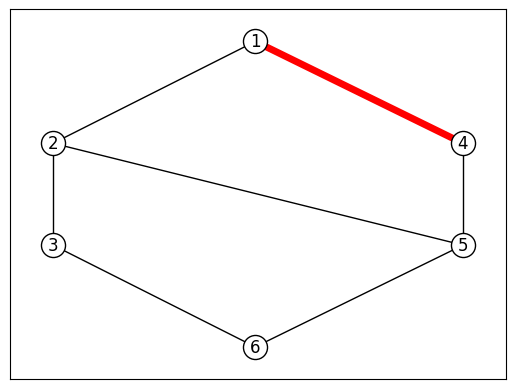

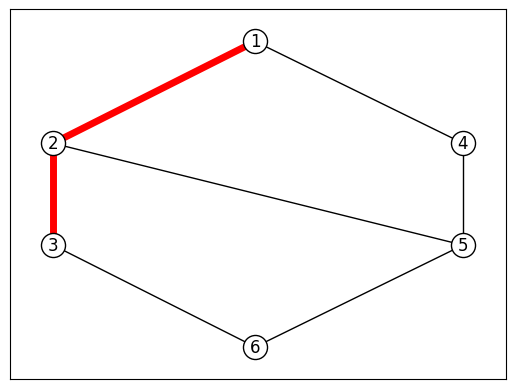

In [15]:
for graph in gs:
      draw_subgraph(graph)

The iterator can also be used to solve problems such as shortest path and longest path problems, where the element with the largest or smallest weight is extracted.

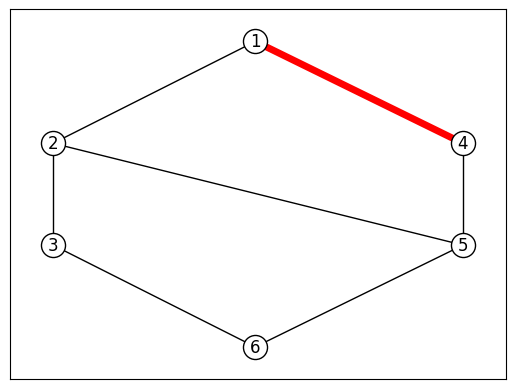

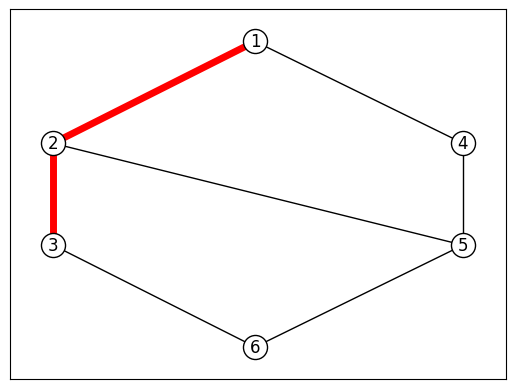

In [16]:
min_graph = next(gs.min_iter()) # choose a subgraph with the smallest number of edges from gs
draw_subgraph(min_graph)
max_graph = next(gs.max_iter()) # choose a subgraph with the maximum number of edges from gs
draw_subgraph(max_graph)

## Summary

This chapter has described the `GraphSet` class, the core functionality of Graphillion. By initializing, constructing, manipulating, and querying a GraphSet in the order described in this chapter, you can solve problems related to graphs. In [next chapter](07_answering_path_query.ipynb), we will show you how to utilize the functionality of the `GraphSet` class to solve problems.